In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import shap

In [43]:
# Conduct proper data scaling based on the model requirements
data = pd.read_csv('/content/drive/MyDrive/yrbss/balanced_dataset.csv')
X = data.drop('suicide_attempt', axis=1)
y = data['suicide_attempt']

In [31]:
regression_data = pd.read_csv('/content/drive/MyDrive/yrbss/regression_df.csv')
X_reg = regression_data.drop('suicide_attempt', axis=1)
y_reg = regression_data['suicide_attempt']
scaler = StandardScaler()
X_st = pd.DataFrame(scaler.fit_transform(X_reg), columns=X_reg.columns)
X_st.head()

BMIPCT  q14_skipped_school_bc_insecure_0.0  \
0  0.449118                            0.486156   
1 -0.586702                            0.486156   
2 -2.188734                            0.486156   
3  1.308666                            0.486156   
4  1.227148                            0.486156   

   q14_skipped_school_bc_insecure_1.0  q14_skipped_school_bc_insecure_2.5  \
0                            -0.28612                             -0.2573   
1                            -0.28612                             -0.2573   
2                            -0.28612                             -0.2573   
3                            -0.28612                             -0.2573   
4                            -0.28612                             -0.2573   

   q14_skipped_school_bc_insecure_4.5  q14_skipped_school_bc_insecure_6.0  \
0                           -0.133692                           -0.192811   
1                           -0.133692                           -0.192811   
2                           -0.133692                           -0.192811   
3                           -0.133692                           -0.192811   
4                           -0.133692                           -0.192811   

   q15_been_threatened_at_school_0.0  q15_been_threatened_at_school_1.0  \
0                           0.418413                          -0.247563   
1                           0.418413                          -0.247563   
2                           0.418413                          -0.247563   
3                           0.418413                          -0.247563   
4                           0.418413                          -0.247563   

   q15_been_threatened_at_school_2.5  q15_been_threatened_at_school_4.5  ...  \
0                           -0.21497                          -0.126497  ...   
1                           -0.21497                          -0.126497  ...   
2                           -0.21497                          -0.126497  ...   
3                           -0.21497                          -0.126497  ...   
4                           -0.21497                          -0.126497  ...   

   q66_weight_perception_2.0  q66_weight_perception_3.0  \
0                  -0.842744                   1.469141   
1                   1.186601                  -0.680670   
2                   1.186601                  -0.680670   
3                  -0.842744                   1.469141   
4                  -0.842744                   1.469141   

   q66_weight_perception_4.0  q86_unstable_housing_0.0  \
0                  -0.305306                   0.29455   
1                  -0.305306                   0.29455   
2                  -0.305306                   0.29455   
3                  -0.305306                   0.29455   
4                  -0.305306                   0.29455   

   q86_unstable_housing_1.0  q86_unstable_housing_2.0  \
0                 -0.183001                 -0.106542   
1                 -0.183001                 -0.106542   
2                 -0.183001                 -0.106542   
3                 -0.183001                 -0.106542   
4                 -0.183001                 -0.106542   

   q86_unstable_housing_3.0  q86_unstable_housing_4.0  \
0                 -0.094603                 -0.070084   
1                 -0.094603                 -0.070084   
2                 -0.094603                 -0.070084   
3                 -0.094603                 -0.070084   
4                 -0.094603                 -0.070084   

   q86_unstable_housing_5.0  q86_unstable_housing_6.0  
0                 -0.082117                 -0.126497  
1                 -0.082117                 -0.126497  
2                 -0.082117                 -0.126497  
3                 -0.082117                 -0.126497  
4                 -0.082117                 -0.126497  

[5 rows x 91 columns]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_st, y_reg, test_size=0.2, random_state=42)

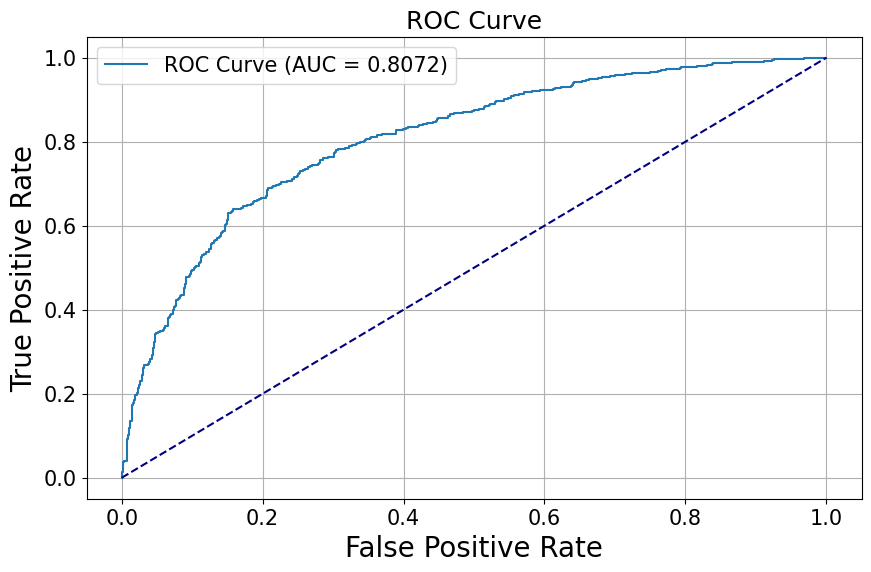

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       568
           1       0.73      0.72      0.72       537

    accuracy                           0.73      1105
   macro avg       0.73      0.73      0.73      1105
weighted avg       0.73      0.73      0.73      1105



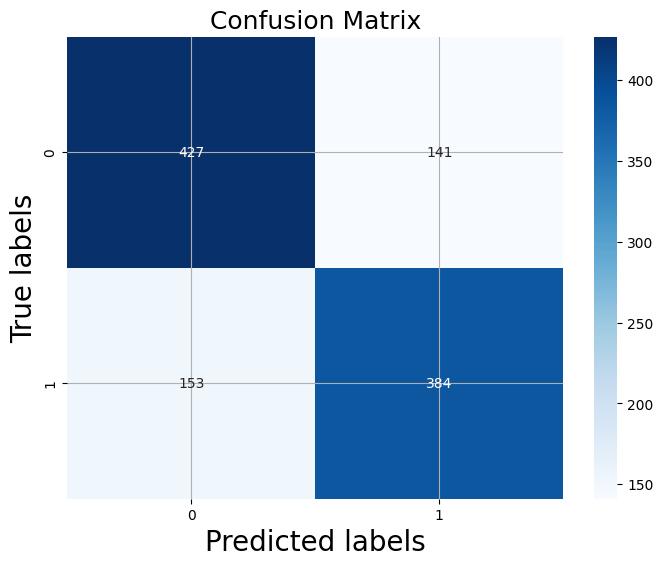

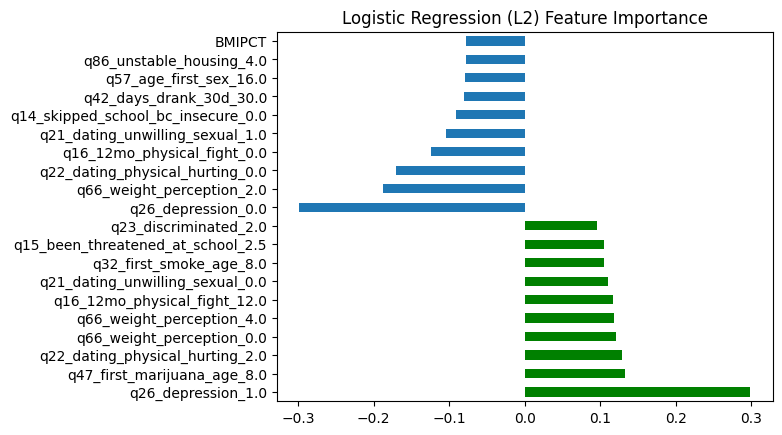

In [34]:
# fit logistic regression, decision tree, xgboost, KNN, LDA, QDA, SVM
logistic_regression = LogisticRegression(C=0.12, penalty='l2', solver='liblinear')
logistic_regression.fit(X_train, y_train)

# ROC curve
y_pred_proba = logistic_regression.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.title('ROC Curve', fontsize=18)
plt.legend(fontsize=15)
plt.show()

# classification report
y_pred = logistic_regression.predict(X_test)
print(classification_report(y_test, y_pred))

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels', fontsize=20)
plt.ylabel('True labels', fontsize=20)
plt.title('Confusion Matrix', fontsize=18)
plt.grid()
plt.show()

# fearure importance
feature_importance = pd.Series(logistic_regression.coef_[0], index=X_train.columns)
top_10_features = feature_importance.nlargest(10)
bottom_10_features = feature_importance.nsmallest(10)
combined_features = pd.concat([top_10_features, bottom_10_features])
combined_features.plot(kind='barh', color=['green' if x in top_10_features.index else '#1f77b4' for x in combined_features.index])
plt.title('Logistic Regression (L2) Feature Importance')
plt.show()

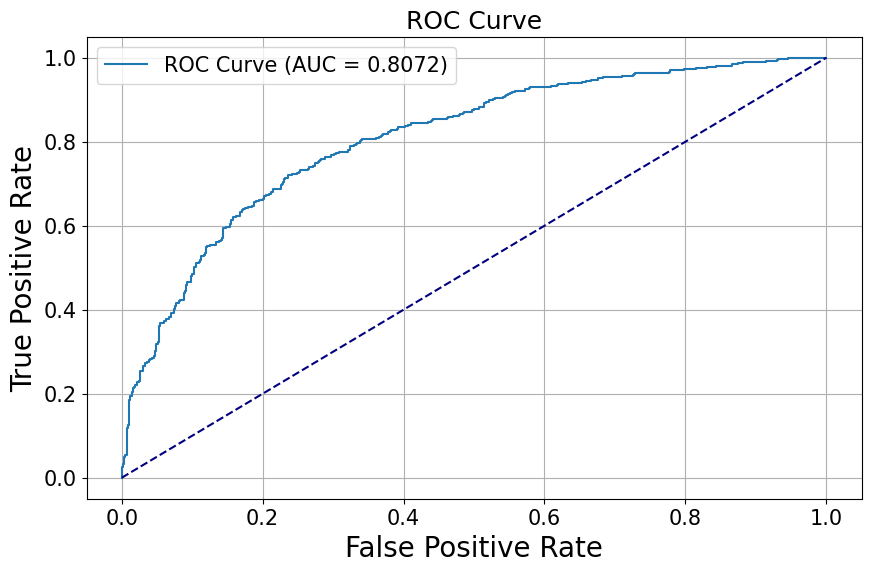

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       568
           1       0.73      0.73      0.73       537

    accuracy                           0.74      1105
   macro avg       0.74      0.74      0.74      1105
weighted avg       0.74      0.74      0.74      1105



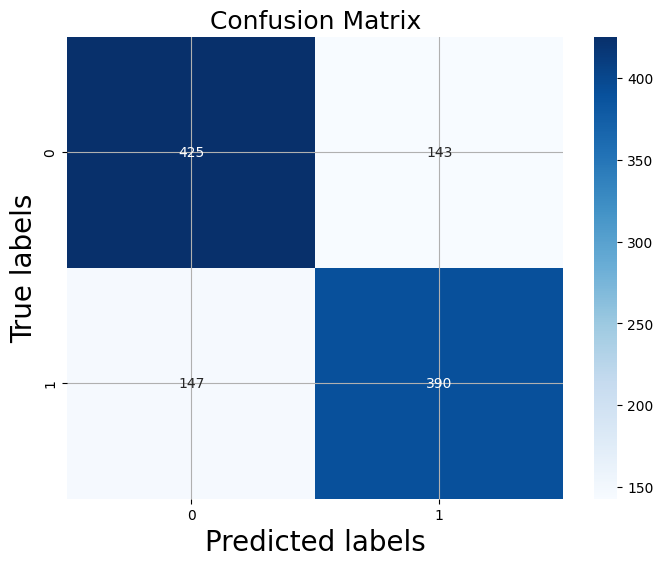

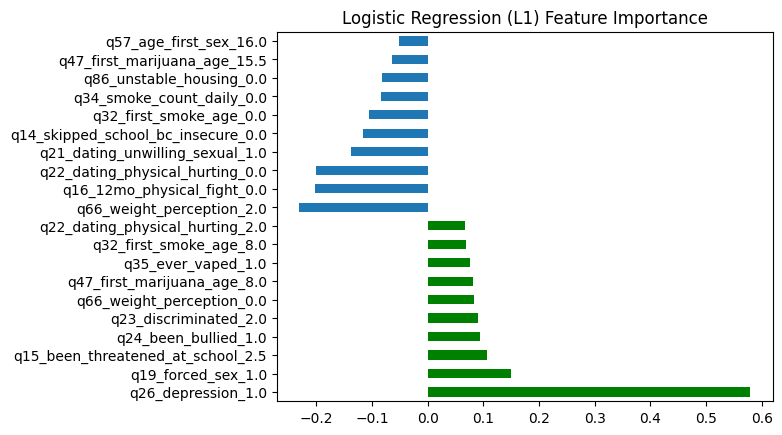

In [35]:
# fit logistic regression, decision tree, xgboost, KNN, LDA, QDA, SVM
logistic_regression = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
logistic_regression.fit(X_train, y_train)

# ROC curve
y_pred_proba = logistic_regression.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.title('ROC Curve', fontsize=18)
plt.legend(fontsize=15)
plt.show()

# classification report
y_pred = logistic_regression.predict(X_test)
print(classification_report(y_test, y_pred))

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels', fontsize=20)
plt.ylabel('True labels', fontsize=20)
plt.title('Confusion Matrix', fontsize=18)
plt.grid()
plt.show()

# fearure importance
feature_importance = pd.Series(logistic_regression.coef_[0], index=X_train.columns)
top_10_features = feature_importance.nlargest(10)
bottom_10_features = feature_importance.nsmallest(10)
combined_features = pd.concat([top_10_features, bottom_10_features])
combined_features.plot(kind='barh', color=['green' if x in top_10_features.index else '#1f77b4' for x in combined_features.index])
plt.title('Logistic Regression (L1) Feature Importance')
plt.show()

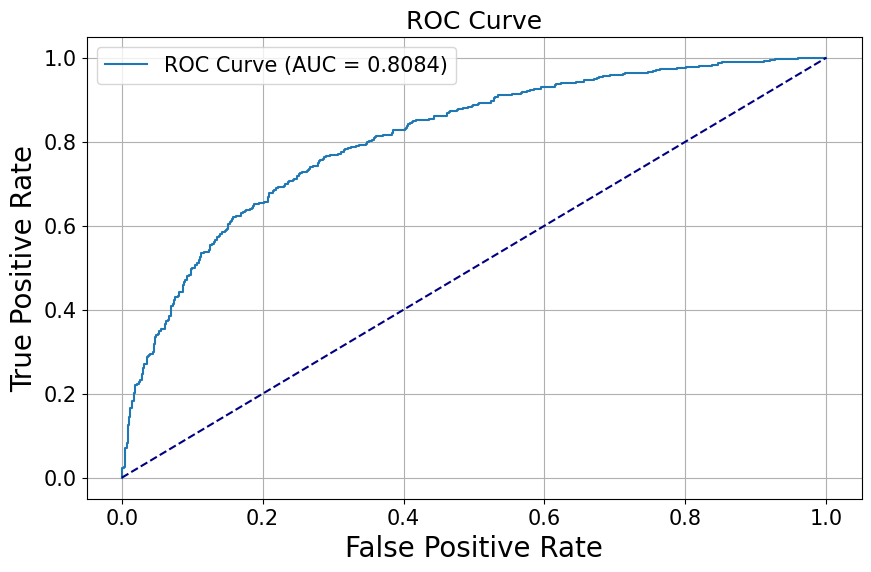

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       568
           1       0.73      0.72      0.72       537

    accuracy                           0.73      1105
   macro avg       0.73      0.73      0.73      1105
weighted avg       0.73      0.73      0.73      1105



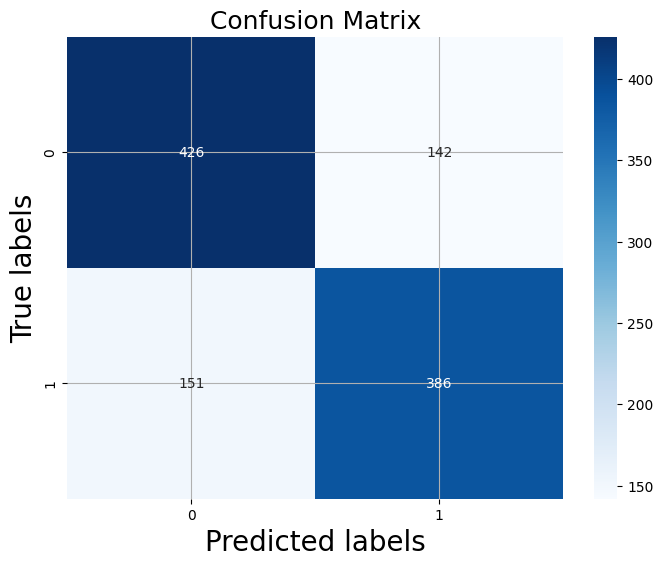

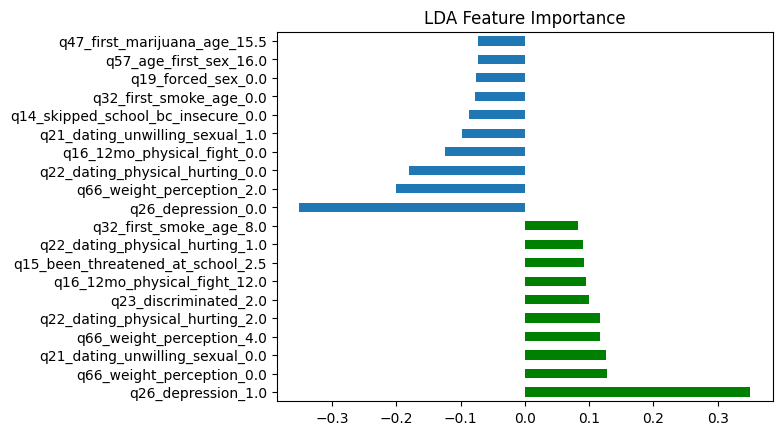

In [36]:
# fit lda
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(X_train, y_train)

# ROC curve
y_pred_proba = lda.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.title('ROC Curve', fontsize=18)
plt.legend(fontsize=15)
plt.show()

# classification report
y_pred = lda.predict(X_test)

print(classification_report(y_test, y_pred))

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels', fontsize=20)
plt.ylabel('True labels', fontsize=20)
plt.title('Confusion Matrix', fontsize=18)
plt.grid()
plt.show()

# feature importance
feature_importance = pd.Series(lda.coef_[0], index=X_train.columns)
top_10_features = feature_importance.nlargest(10)
bottom_10_features = feature_importance.nsmallest(10)
combined_features = pd.concat([top_10_features, bottom_10_features])
combined_features.plot(kind='barh', color=['green' if x in top_10_features.index else '#1f77b4' for x in combined_features.index])
plt.title('LDA Feature Importance')
plt.show()

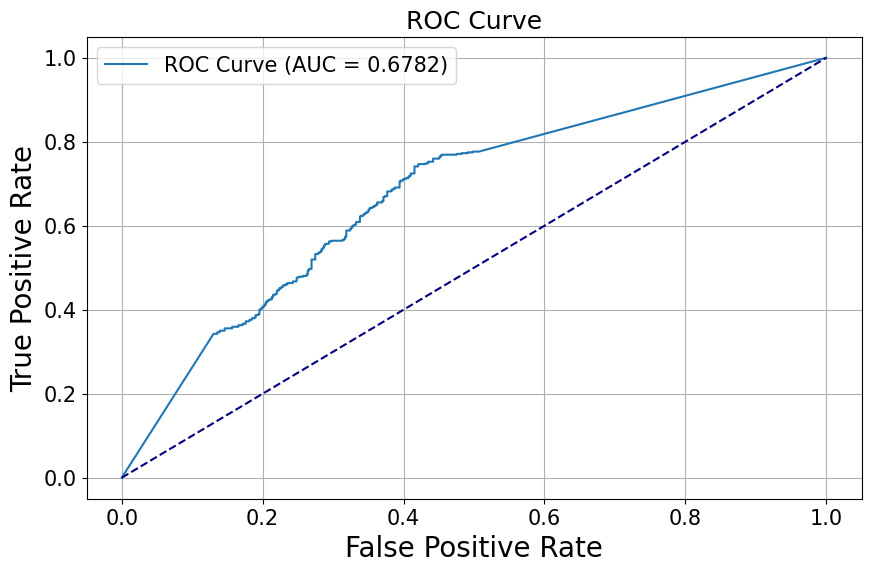

              precision    recall  f1-score   support

           0       0.63      0.70      0.66       568
           1       0.64      0.56      0.60       537

    accuracy                           0.64      1105
   macro avg       0.64      0.63      0.63      1105
weighted avg       0.64      0.64      0.63      1105



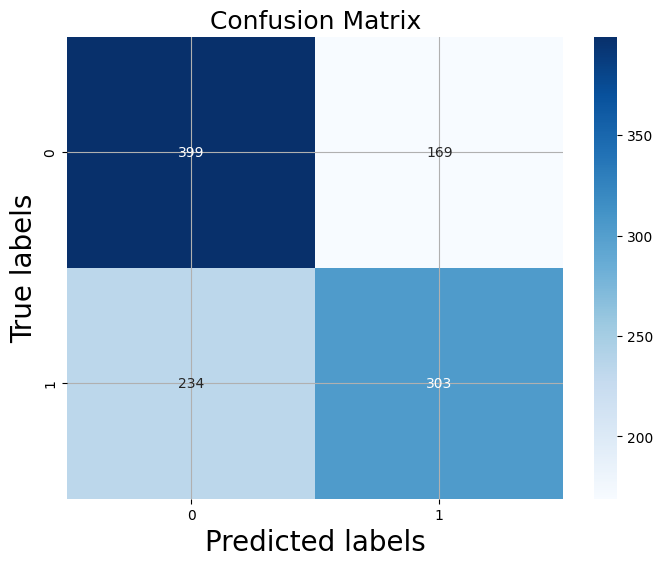

In [21]:
# fit knn
knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean', weights='distance')
knn.fit(X_train, y_train)

# ROC curve
y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.title('ROC Curve', fontsize=18)
plt.legend(fontsize=15)
plt.show()

# classification report
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels', fontsize=20)
plt.ylabel('True labels', fontsize=20)
plt.title('Confusion Matrix', fontsize=18)
plt.grid()
plt.show()


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

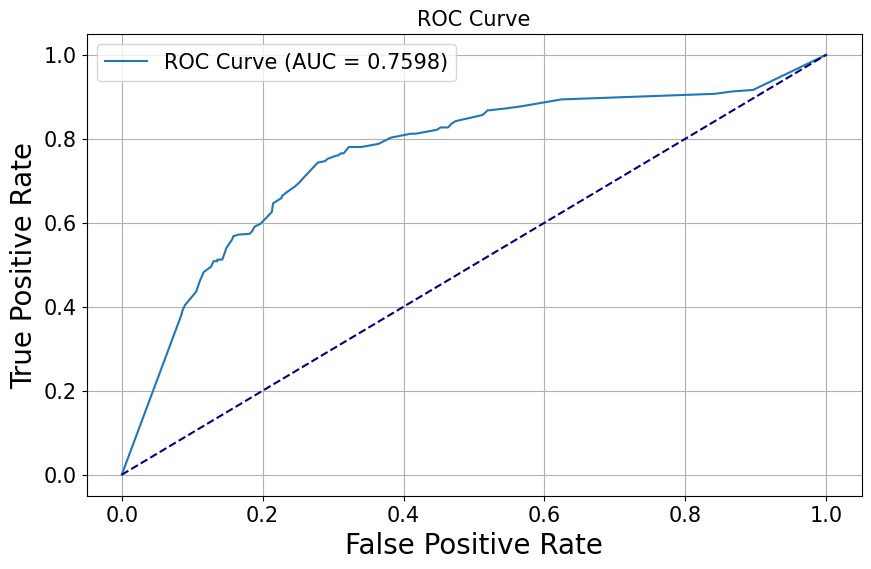

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       568
           1       0.72      0.69      0.71       537

    accuracy                           0.72      1105
   macro avg       0.72      0.72      0.72      1105
weighted avg       0.72      0.72      0.72      1105



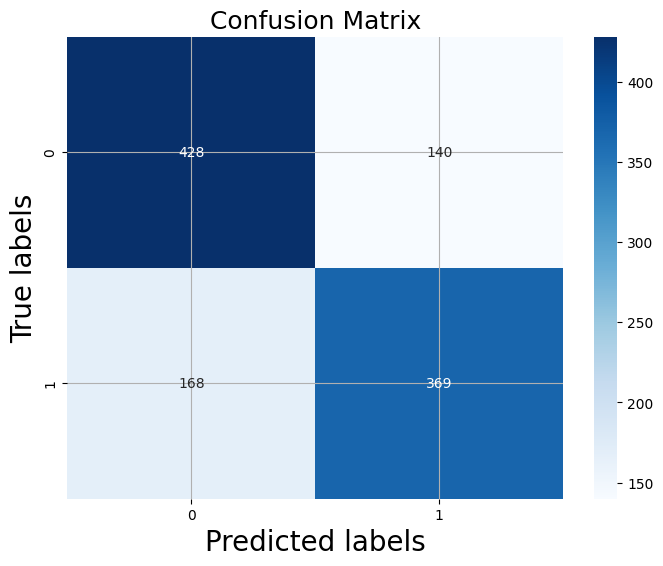

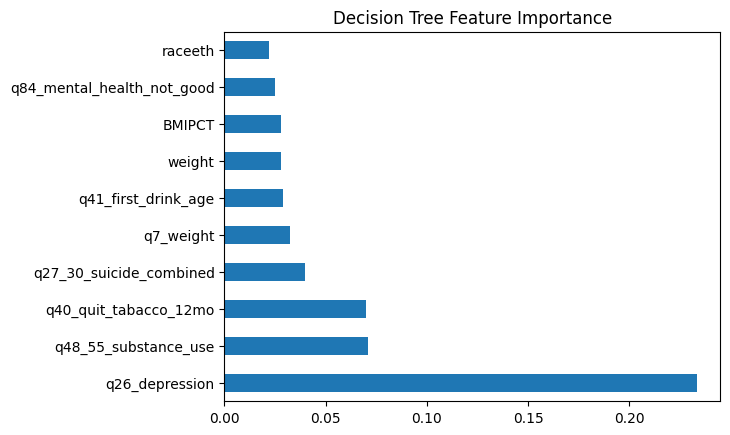

In [7]:
# fit decision tree
decision_tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2)
decision_tree.fit(X_train, y_train)

# ROC curve
y_pred_proba = decision_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.title('ROC Curve', fontsize=15)
plt.legend(fontsize=15)
plt.show()

# classification report
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels', fontsize=20)
plt.ylabel('True labels', fontsize=20)
plt.title('Confusion Matrix', fontsize=18)
plt.grid()
plt.show()

# feature importance
feature_importance = pd.Series(decision_tree.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Decision Tree Feature Importance')
plt.show()

In [8]:
# tree structure
from sklearn.tree import plot_tree

plt.figure(figsize=(300, 50))
plot_tree(decision_tree, feature_names=X.columns, filled=True, fontsize=10)
plt.show()

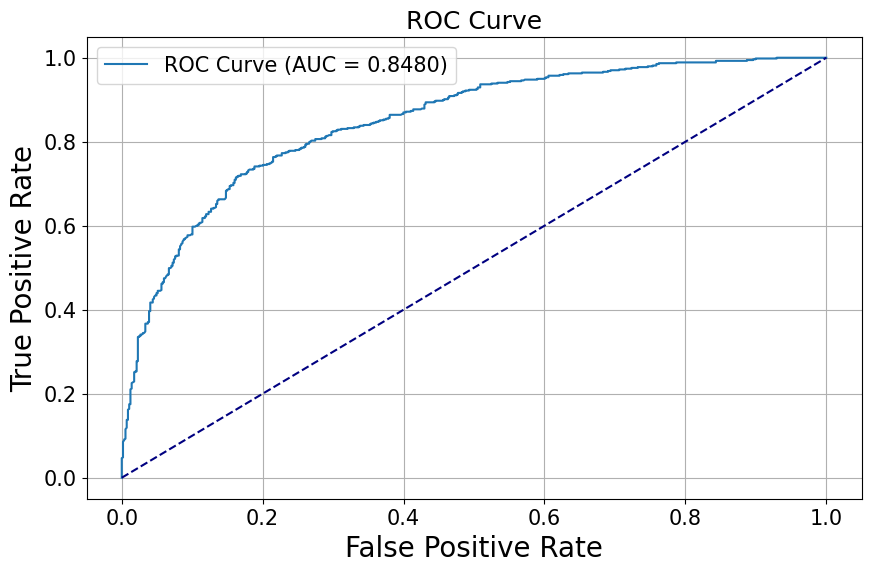

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       568
           1       0.75      0.78      0.76       537

    accuracy                           0.77      1105
   macro avg       0.77      0.77      0.77      1105
weighted avg       0.77      0.77      0.77      1105



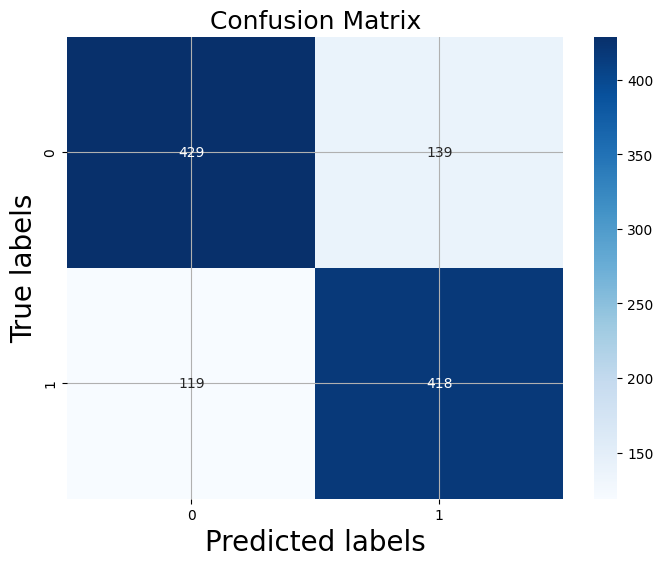

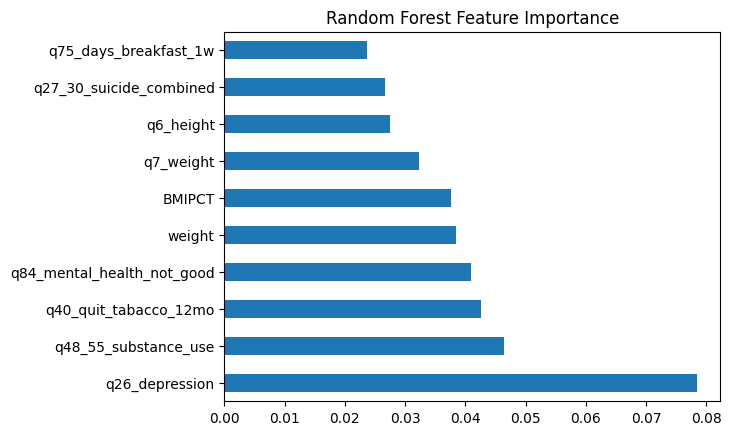

In [9]:
# fit randomforest
random_forest = RandomForestClassifier(bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100)
random_forest.fit(X_train, y_train)

# ROC curve
y_pred_proba = random_forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.title('ROC Curve', fontsize=18)
plt.legend(fontsize=15)
plt.show()

# classification report
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels', fontsize=20)
plt.ylabel('True labels', fontsize=20)
plt.title('Confusion Matrix', fontsize=18)
plt.grid()
plt.show()

# feature importance
feature_importance = pd.Series(random_forest.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.show()

[LightGBM] [Info] Number of positive: 2225, number of negative: 2194
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 4419, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503508 -> initscore=0.014031
[LightGBM] [Info] Start training from score 0.014031
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

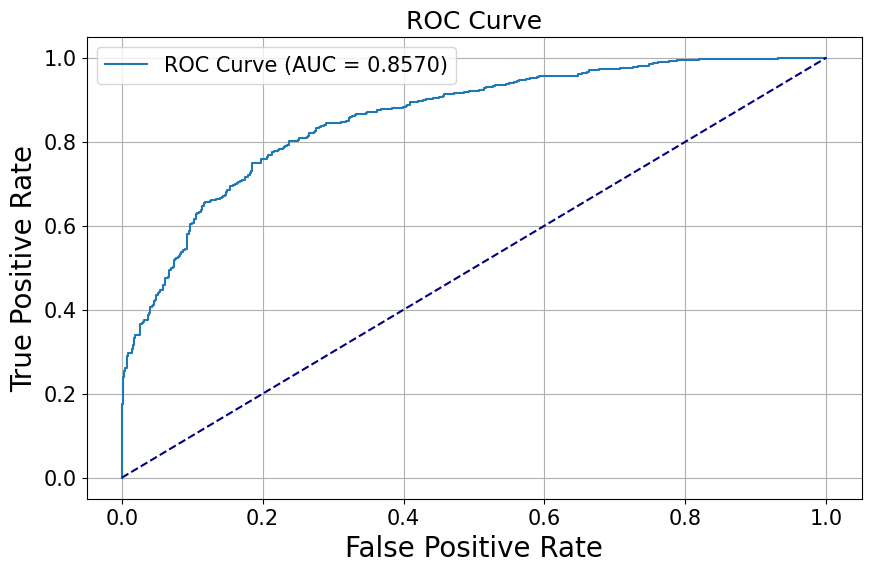

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       568
           1       0.77      0.78      0.77       537

    accuracy                           0.78      1105
   macro avg       0.78      0.78      0.78      1105
weighted avg       0.78      0.78      0.78      1105



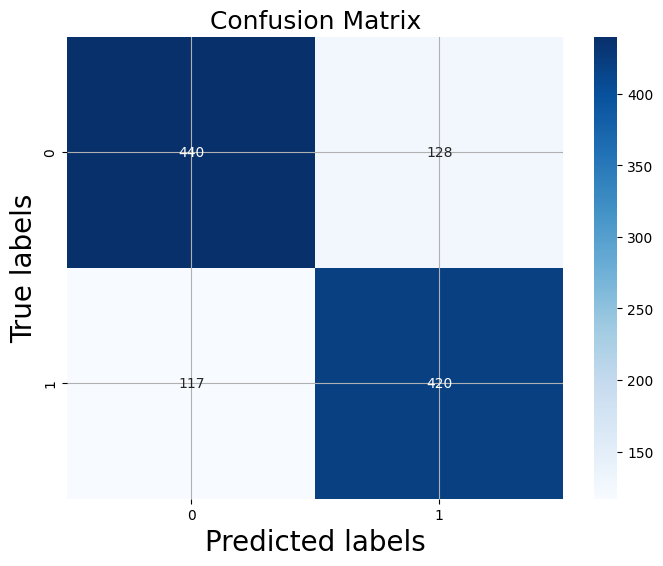

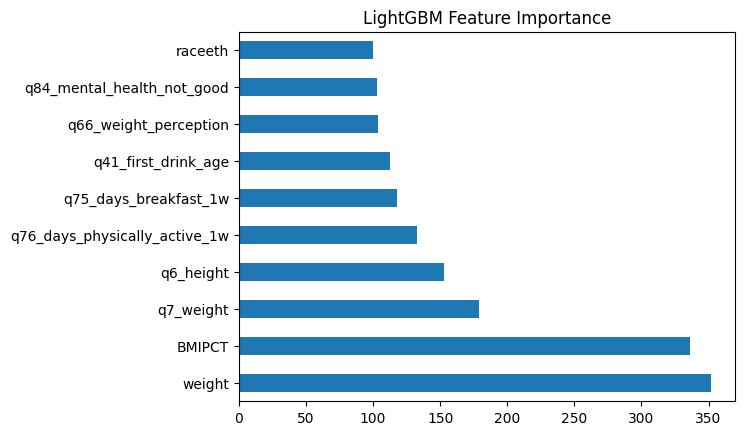

In [28]:
# lightgbm
lightgbm = LGBMClassifier(max_depth=6, n_estimators=140, learning_rate=0.09)
lightgbm.fit(X_train, y_train)

# ROC curve
y_pred_proba = lightgbm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.title('ROC Curve', fontsize=18)
plt.legend(fontsize=15)
plt.show()

# classification report
y_pred = lightgbm.predict(X_test)
print(classification_report(y_test, y_pred))

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels', fontsize=20)
plt.ylabel('True labels', fontsize=20)
plt.title('Confusion Matrix', fontsize=18)
plt.grid()
plt.show()

# feature importance
feature_importance = pd.Series(lightgbm.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('LightGBM Feature Importance')
plt.show()

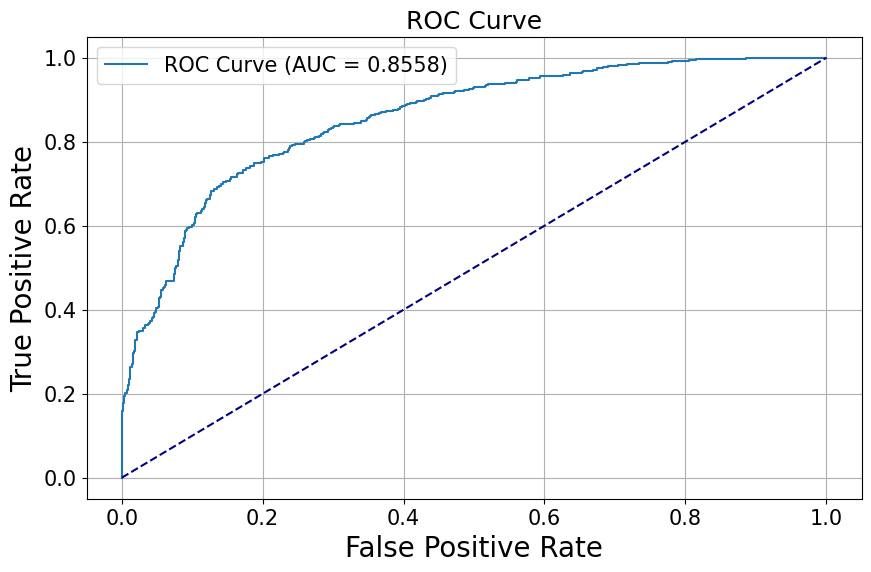

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       568
           1       0.78      0.76      0.77       537

    accuracy                           0.78      1105
   macro avg       0.78      0.78      0.78      1105
weighted avg       0.78      0.78      0.78      1105



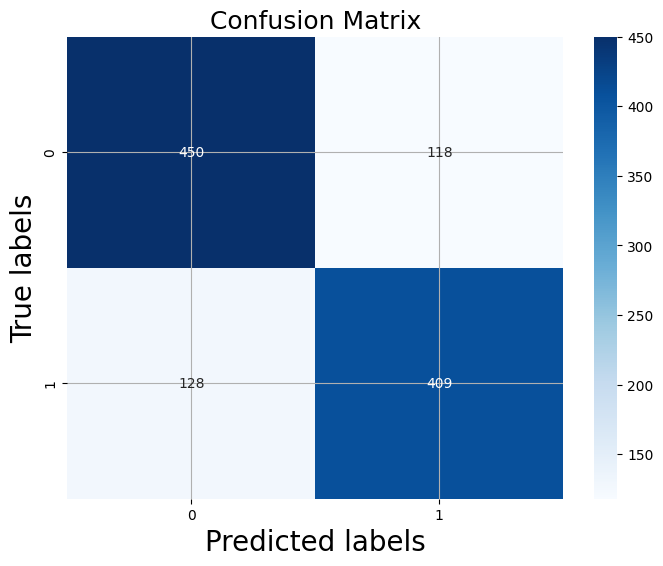

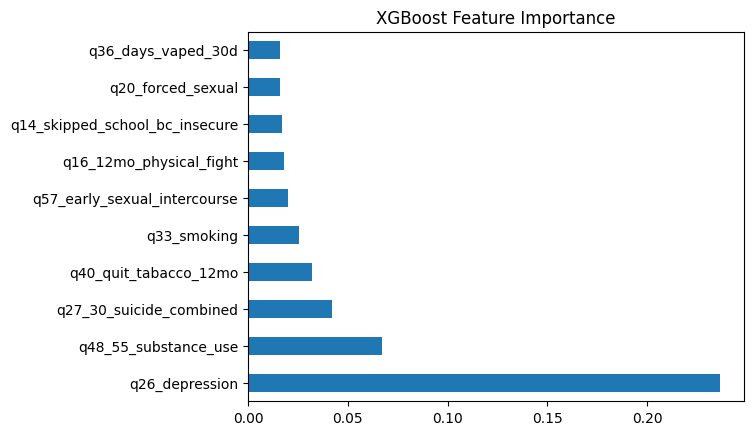

In [29]:
# xgboost
xgb = XGBClassifier(learning_rate=0.08, n_estimators=100, max_depth=6)
xgb.fit(X_train, y_train)

# ROC curve
y_pred_proba = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.title('ROC Curve', fontsize=18)
plt.legend(fontsize=15)
plt.show()

# classification report
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels', fontsize=20)
plt.ylabel('True labels', fontsize=20)
plt.title('Confusion Matrix', fontsize=18)
plt.grid()
plt.show()

# feature importance
feature_importance = pd.Series(xgb.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('XGBoost Feature Importance')
plt.show()

[LightGBM] [Info] Number of positive: 2225, number of negative: 2194
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 4419, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503508 -> initscore=0.014031
[LightGBM] [Info] Start training from score 0.014031
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

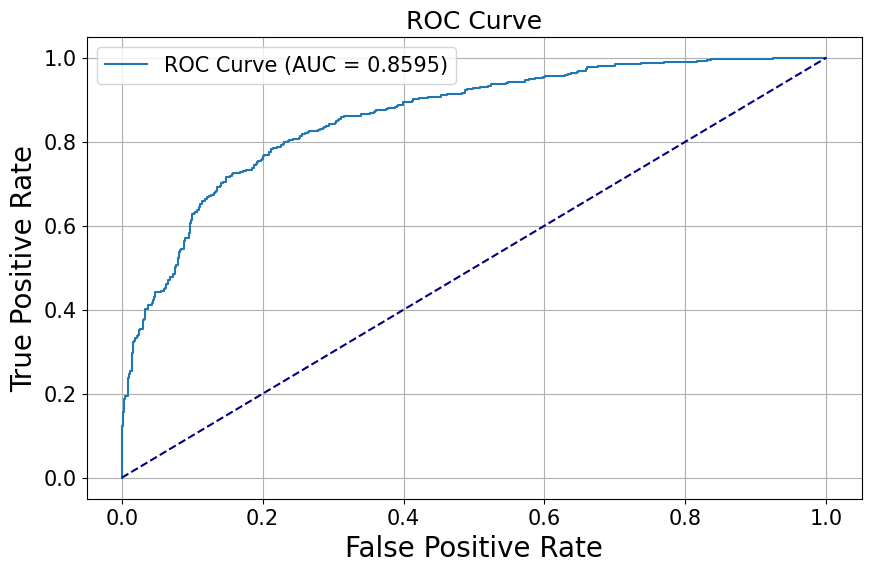

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       568
           1       0.78      0.78      0.78       537

    accuracy                           0.78      1105
   macro avg       0.78      0.78      0.78      1105
weighted avg       0.78      0.78      0.78      1105



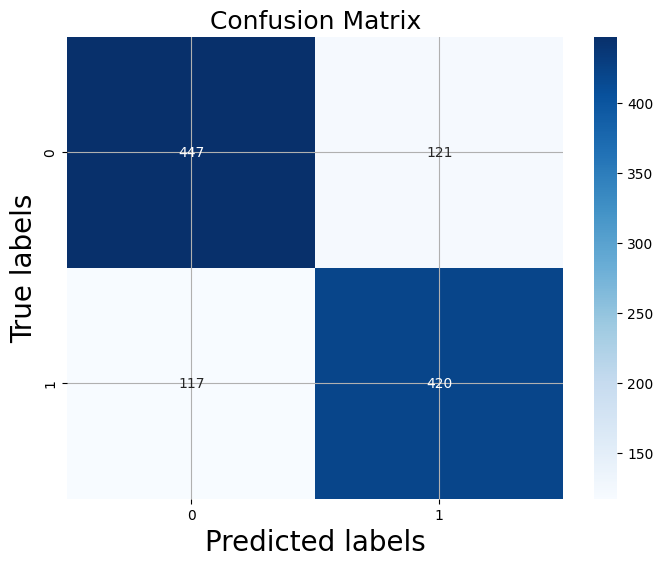

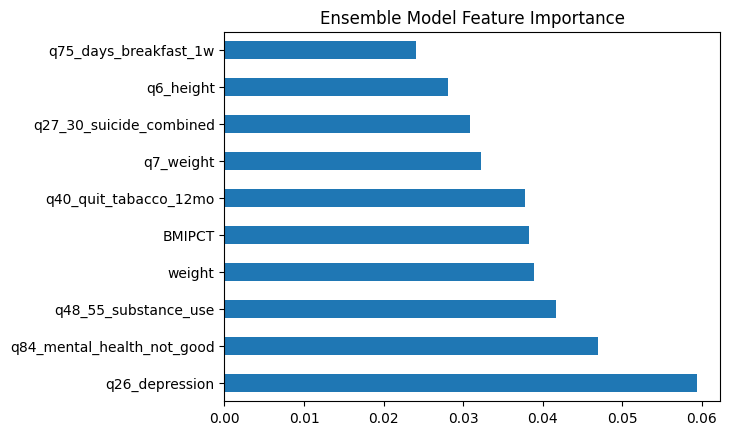

In [45]:
model_rf = RandomForestClassifier(random_state=42, bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100)
model_gb = LGBMClassifier(random_state=42, max_depth=6, n_estimators=140, learning_rate=0.09)
model_xb = XGBClassifier(random_state=42, learning_rate=0.08, n_estimators=100, max_depth=6)

ensemble_model = VotingClassifier(
    estimators=[
        ('rf', model_rf),
        ('gb', model_gb),
        ('xb', model_xb)
    ],
    voting='soft'
)

ensemble_model.fit(X_train, y_train)

# ROC
y_pred_proba = ensemble_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.title('ROC Curve', fontsize=18)
plt.legend(fontsize=15)
plt.show()

# classification report
y_pred = ensemble_model.predict(X_test)
print(classification_report(y_test, y_pred))

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels', fontsize=20)
plt.ylabel('True labels', fontsize=20)
plt.title('Confusion Matrix', fontsize=18)
plt.grid()
plt.show()

# feature importance
feature_importance = pd.Series(ensemble_model.named_estimators_['rf'].feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Ensemble Model Feature Importance')
plt.show()